kmeans clustering

hirarchical clustering

dbscan clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
from sklearn.cluster import KMeans
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0],[100,110],[1000,1200]])

In [ ]:
X.dtype

In [ ]:
X

In [ ]:
kmeans = KMeans(n_clusters=4)

In [ ]:
kmeans.fit(X)

In [ ]:
kmeans.labels_

In [ ]:
data=pd.DataFrame(X)

In [ ]:
labels=pd.DataFrame(kmeans.labels_)

In [ ]:
datawithlabel=pd.concat([data,labels],axis=1)

In [ ]:
datawithlabel

In [ ]:
np.array([[0, 0], [12, 3]])

In [ ]:
kmeans.predict([[0, 0], [12, 3]])

In [ ]:
kmeans.cluster_centers_


In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=10)

In [3]:
X

array([[ 4.56889035, -9.9492391 ],
       [ 2.35388502,  3.51466401],
       [-0.01750156, -6.05038477],
       ...,
       [ 4.89123569,  4.86995972],
       [ 1.09272697,  4.04641343],
       [ 0.97077866, -4.8289551 ]])

In [4]:
y

array([0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2,
       2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2,
       2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1,
       2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2,
       1, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2,
       1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2,
       1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0,
       0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2,

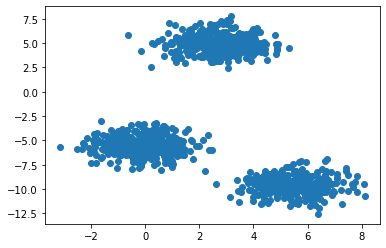

In [5]:
plt.scatter(X[:,0],X[:,1])

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=20)

In [ ]:
wcss=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k,init="k-means++")
    kmean.fit(X_train)
    wcss.append(kmean.inertia_)
    

In [ ]:
wcss

In [ ]:
plt.plot(range(2,11),wcss)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

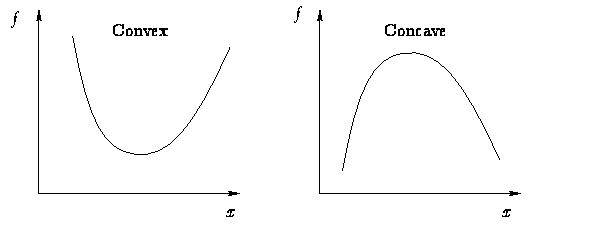|

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [ ]:
y_lables=kmeans.fit_predict(X_train)

In [ ]:
y_lables

In [ ]:
y_train

In [ ]:
X_train[:,0]

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_lables)

In [ ]:
wcss

In [ ]:
from kneed import KneeLocator

In [ ]:
k=KneeLocator(range(2,11),wcss,curve='convex',direction='decreasing')

In [ ]:
k.elbow

In [7]:
from sklearn.metrics import silhouette_score

In [9]:
from sklearn.cluster import KMeans
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [10]:
silhouette_coefficients

[0.7273220153669463,
 0.7835543034796946,
 0.6296864214964658,
 0.44467573166547414,
 0.31462644441690624,
 0.3279696423058667,
 0.341213768252892,
 0.3488979056718377,
 0.3441929537548391]

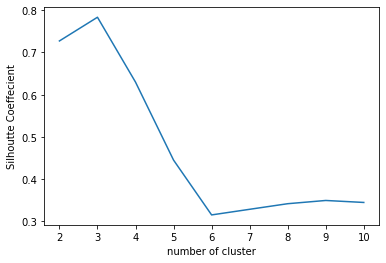

In [11]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

In [ ]:
# you have a data set

# unsupervised+supervised=semisupervised

classification data(wafer data)

you have a multiple files 

take all the files and create a single dataframe

then you have to perform clustering(kmean,hirarchical,dbscan)

after clustering the data will be segeregated in different clsuters

then you have to perform supervised mllearning(log reg,svc,DTC,RF, boosting classifier) on each and every cluster
and find out the best algorithm
